In [10]:
import pandas as pd
import numpy as np
import labellines
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scripts.preprocess_utils import closest_value,find_centile,find_exact_percentile_return_number,add_median_labels 

df_centile_boys = pd.read_csv('data/percentiles_chart_boys.csv',header=0)
df_centile_girls = pd.read_csv('data/percentiles_chart_girls.csv',header=0)
df_centile_boys_csa =pd.read_csv("data/percentiles_chart_boys_csa.csv", header=0)
df_centile_girls_csa =pd.read_csv("data/percentiles_chart_girls_csa.csv", header=0)


df_bch = pd.read_csv("data/bch/df_bch_accepted.csv", delimiter="," , header=0)
df_dmg = pd.read_csv("data/DMG_MRI_nifti/df_matched_dmg.csv", delimiter="," , header=0)

def closest_value(input_list, input_value):
    arr = np.asarray(input_list)
    i = (np.abs(arr - input_value)).argmin()
    return arr[i], i

def find_centile(input_tmt, age, df):
    #print("TMT:",input_tmt,"Age:", age)
    val,i=closest_value(df['x'],age)
    
    centile = 'out of range'
    if input_tmt<df.iloc[i]['X3']:
        centile ='< 3'
    if df.iloc[i]['X3']<=input_tmt<df.iloc[i]['X10']:
        centile ='3-10'
    if df.iloc[i]['X10']<=input_tmt<df.iloc[i]['X25']:
        centile ='10-25'
    if df.iloc[i]['X25']<=input_tmt<df.iloc[i]['X50']:
        centile ='25-50'
    if df.iloc[i]['X50']<=input_tmt<df.iloc[i]['X75']:
        centile ='50-75'
    if df.iloc[i]['X75']<=input_tmt<df.iloc[i]['X90']:
        centile ='75-90'
    if df.iloc[i]['X90']<=input_tmt<df.iloc[i]['X97']:
        centile ='90-97'
    if input_tmt>df.iloc[i]['X97']:
        centile ='97>'
    #print(val,i,centile)
    return centile

def find_exact_percentile_return_number(input_tmt, age, df):
    #print("TMT:",input_tmt,"Age:", age)
    val,i=closest_value(df['x'],age)
    
    mu = df.iloc[i]['mu']
    sigma = df.iloc[i]['sigma']
    nu = df.iloc[i]['nu']
    #tau = df.iloc[i]['tau']
    
    if nu!=0:
        z = ((input_tmt/mu)**(nu)-1)/(nu*sigma)
    else:
        z = 1/sigma * math.log(input_tmt/mu)
    percentile = scipy.stats.norm.cdf(z)
    return round(percentile*100,2)

In [199]:
find_exact_percentile_return_number(8.08,9,df_centile_girls)

8.13

In [133]:
cohort=[]
cohort_csa=[]
for i in range(0, len(df_bch)):
    if round(df_bch['Age MRI'].iloc[i])< 4:
        age = 4
    else:
        age = round(df_bch['Age MRI'].iloc[i])
        
    if df_bch['Sex'].iloc[i]=='Female':
        sex=2
        centile_tmt = find_exact_percentile_return_number(df_bch['TMT'].iloc[i], age,df_centile_girls)
        centile_csa =find_exact_percentile_return_number(df_bch['CSA'].iloc[i], age,df_centile_girls_csa)
    else:
        sex=1
        centile_tmt = find_exact_percentile_return_number(df_bch['TMT'].iloc[i], age, df_centile_boys)
        centile_csa =find_exact_percentile_return_number(df_bch['CSA'].iloc[i], age,df_centile_boys_csa)
    
    cohort.append([df_bch['BCH MRN'].iloc[i],
                           sex,
                           df_bch['Age MRI'].iloc[i],
                            df_bch['TMT'].iloc[i],
                   centile_tmt,#centile_csa,
                   'pLGG',"Cancer DX"])
    
    cohort_csa.append([df_bch['BCH MRN'].iloc[i],
                           sex,
                           df_bch['Age MRI'].iloc[i],
                            df_bch['TMT'].iloc[i],
                   centile_csa,
                   'pLGG',"Cancer DX"])

    #break
    

In [135]:
for i in range(0, len(df_dmg)):
    if round(df_dmg['years_at_scan'].iloc[i])< 4:
        age = 4
    else:
        age = round(df_dmg['years_at_scan'].iloc[i])
        
    if df_dmg['sex'].iloc[i]=='F':
        sex=2
        centile_dx = find_exact_percentile_return_number(df_dmg['tmt'].iloc[i], age,df_centile_girls)
        
        centile_csa =find_exact_percentile_return_number(df_bch['CSA'].iloc[i], age,df_centile_girls_csa)

    else:
        sex=1
        centile_dx = find_exact_percentile_return_number( df_dmg['tmt'].iloc[i], age, df_centile_boys)
       
    
    cohort.append([df_dmg['id'].iloc[i],
                           sex,
                           df_dmg['years_at_scan'].iloc[i],
                            df_dmg['tmt'].iloc[i],
                   centile_dx,
                   'DMG',"Cancer DX"])
    #break
    

In [17]:
cohort_df=pd.DataFrame(cohort,columns=['ID',"Sex","Age",'TMT',"%tile",'Cohort',"Category"])
cohort_df

,ID,Sex,Age,TMT,%tile,Cohort,Category
0,4182189,1,23.331507,14.32,52.87,pLGG,Cancer DX
1,4524098,2,3.600000,7.94,25.34,pLGG,Cancer DX
2,4724421,1,14.487671,11.62,35.00,pLGG,Cancer DX
3,4291698,1,10.284932,7.96,2.61,pLGG,Cancer DX
4,2088644,2,17.528767,15.94,91.42,pLGG,Cancer DX
...,...,...,...,...,...,...,...
67800,NDARINV1535421B,2,11.000000,13.33,79.70,Low kcal/d,kcal/d
67801,NDARINV158CYMLK,1,11.000000,10.62,34.24,Low kcal/d,kcal/d
67802,NDARINV1378XGLA,2,11.000000,11.97,60.56,Low kcal/d,kcal/d
67803,NDARINV13GH02YK,2,11.000000,8.56,8.32,Low kcal/d,kcal/d


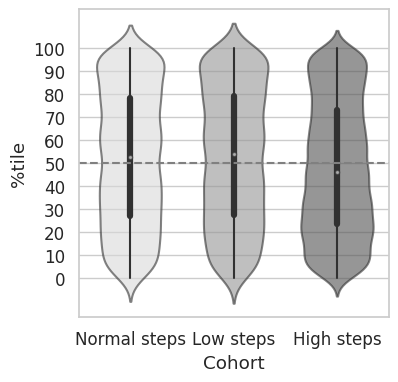

In [178]:
f, ax = plt.subplots(figsize=(4, 4))

sns.set(style="whitegrid",font_scale= 1.1)
cohort_df['N'] = (cohort_df['Cohort'].map(cohort_df['Cohort'].value_counts())).astype(int)
        
cohort_df['Gender'] = cohort_df['Sex'].map({2:'Female',1:'Male'})
ax=sns.violinplot( y=cohort_df['%tile'],x=cohort_df['Cohort'],
                    data=cohort_df,dodge=False,
                  width=0.7,
               palette = 'Greys',
                  alpha=0.3,
                  order =['pLGG','DMG'],
                saturation = 4)
plt.setp(ax.collections, alpha=.6)
ax.set_yticks(range(0,101,10))
ax.axhline(y = 50, color = 'gray',linestyle="--")
plt.show()

[None, None, None, None, None, None]

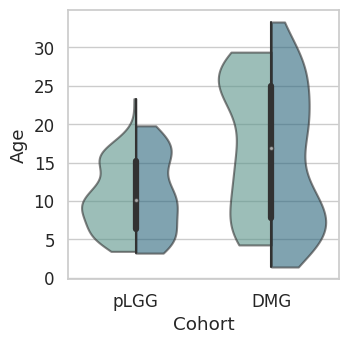

In [195]:
f, ax = plt.subplots(figsize=(3.5, 3.5))

sns.set(style="whitegrid",font_scale= 1.1)

cohort_df[cohort_df['Category']=='Cancer DX']
ax= sns.violinplot(data=cohort_df[cohort_df['Category']=='Cancer DX'], x="Cohort", y="Age",#,hue='Cohort',
                  width=0.8,
                   cut=0,
                   hue='Gender',
                   legend=False, 
               palette = 'crest',split=True,
                #linewidth=3,
                   alpha=0.5)
plt.legend([],[], frameon=False)

#ax.set_yticks(range(0,101,10))
#ax.axhline(y = 50, color = 'gray',linestyle="--")

plt.setp(ax.collections, alpha=.6)

In [204]:
cohort_df[cohort_df['Cohort']=='pLGG'].describe()

,Sex,Age,TMT,%tile,N
count,144.000000,144.000000,144.000000,144.000000,144.0
mean,1.430556,10.649486,9.944653,33.328472,144.0
std,0.496882,4.703778,2.998376,29.771142,0.0
min,1.000000,3.224658,2.260000,0.000000,144.0
25%,1.000000,6.303425,7.967500,6.622500,144.0
50%,1.000000,10.147945,10.050000,26.720000,144.0
75%,2.000000,15.235616,11.625000,52.952500,144.0
max,2.000000,23.331507,19.600000,99.040000,144.0


In [206]:
cohort_df[cohort_df['Cohort']=='pLGG']['Sex'].value_counts(normalize=True)

1    0.569444
2    0.430556
Name: Sex, dtype: float64

In [205]:
cohort_df[cohort_df['Cohort']=='DMG'].describe()

,Sex,Age,TMT,%tile,N
count,121.000000,121.000000,121.000000,121.000000,121.0
mean,1.545455,16.341039,9.916694,30.118595,121.0
std,0.500000,8.964778,4.091248,30.480414,0.0
min,1.000000,1.416438,0.000000,0.000000,121.0
25%,1.000000,7.819178,7.670000,1.950000,121.0
50%,2.000000,16.857534,9.860000,20.630000,121.0
75%,2.000000,25.046575,12.300000,44.070000,121.0
max,2.000000,33.317808,20.860000,99.940000,121.0
